Forward and inverse kinematics code has been taken from the repository.

In [3]:
import numpy as np
import math

Generalized forward kinematics

In [4]:
# Link Parameters:    [a, alpha, d, theta]
# For Multiple Links: [[a, alpha, d, theta]
#                      [a, alpha, d, theta]
#                      [a, alpha, d, theta]]

def atransformation(LinkParameters):
    a = LinkParameters[0]
    d = LinkParameters[2]
    alpha = LinkParameters[1]
    theta = LinkParameters[3]
    alpha=alpha*np.pi/180
    theta=theta*np.pi/180
    A = np.array([[[np.cos(theta), -np.sin(theta) * np.cos(alpha), np.sin(theta) * np.sin(alpha), a * np.cos(theta)],
                   [np.sin(theta), np.cos(theta) * np.cos(alpha), -np.cos(theta) * np.sin(alpha), a * np.sin(theta)],
                   [0, np.sin(alpha), np.cos(alpha), d],
                   [0, 0, 0, 1]]])
    return (A)

def forward_kinematics_homogenous_matrix(DH):
    A = np.identity(4)
    n = np.shape(DH)[0]

    for i in range(n):
        Anext = atransformation(DH[i])
        A = np.matmul(A,Anext)
    end_C=np.array([np.around(A[0][0][3],5),np.around(A[0][1][3],5),np.around(A[0][2][3],5)])
    return end_C
    # print("End-effector Coordinates=(",np.around(A[0][0][3],5),np.around(A[0][1][3],5),np.around(A[0][2][3],5),")")

Question 1(a) 
Cornerpoints- P(0.25,0,0.10), Q(0.25,-0.15,0.10), R(0.45,-0.15,0.10), S(0.45,0,0.10)

(Note: put all angles in degree and DH parameters as [a, alpha, d, theta])

**1(a) STANFORD RRP**

In [5]:
def inverse_kinematics_stanford(x1,x2,x3,l1,l2):
    endeffector_position=[x1,x2,x3]
    lengthsoflinks=[l1,l2]
    theta1 = np.arctan(endeffector_position[1]/endeffector_position[0])
    r = np.sqrt(endeffector_position[0]**2 + endeffector_position[1]**2)
    s = endeffector_position[2] - lengthsoflinks[0]
    theta2 = np.arctan(s/r)
    d3 = np.sqrt(r**2 + s**2) - lengthsoflinks[1]
    theta1=theta1*180/np.pi
    theta2=theta2*180/np.pi
    angles=[[theta1,theta2,d3],[180+theta1,180-theta2,d3]]
    return angles
    # print("First Solution(Theta1, Theta2, Extension): (",theta1,",",theta2,",",d3,")")
    # print("Second Solution(Theta1, Theta2, Extension): (",180+theta1,",",180-theta2,",",d3,")")

print("Stanford RRP(Inverse kinematics Solutions):\n")
print("1. For point P:")
L1=inverse_kinematics_stanford(0.25,-0.0,0.1,0.25,0.25)
print("First Solution(Theta1, Theta2, Extension):",L1[0])
print("Second Solution(Theta1, Theta2, Extension):",L1[1])
print("\nVerification of first solution:")
F1=forward_kinematics_homogenous_matrix([[0,90,0.25,0],[0.25,0,0,-30.96375653207352],[0.04154759474226499,0,0,0]])
print("End-effector Coordinates=",F1)
print("\nVerification of second solution:")
F1n=forward_kinematics_homogenous_matrix([[0,90,0.25,180],[0.25,0,0,210.96375653207352],[0.04154759474226499,0,0,0]])
print("End-effector Coordinates=",F1n)

print("\n2. For point Q:")
L2=inverse_kinematics_stanford(0.25,-0.15,0.1,0.25,0.25)
print("First Solution(Theta1, Theta2, Extension):",L2[0])
print("Second Solution(Theta1, Theta2, Extension):",L2[1])
print("\nVerification of first solution:")
F2=forward_kinematics_homogenous_matrix([[0,90,0.25,-30.96375653207352],[0.25,0,0,-27.225627998563958],[0.07787192621510003,0,0,0]])
print("End-effector Coordinates=",F2)
print("\nVerification of second solution:")
F2n=forward_kinematics_homogenous_matrix([[0,90,0.25,149.03624346792648],[0.25,0,0,207.22562799856397],[0.07787192621510003,0,0,0]])
print("End-effector Coordinates=",F2n)

print("\n3. For point R:")
L3=inverse_kinematics_stanford(0.45,-0.15,0.1,0.25,0.25)
print("First Solution(Theta1, Theta2, Extension):",L3[0])
print("Second Solution(Theta1, Theta2, Extension):",L3[1])
print("\nVerification of first solution:")
F3=forward_kinematics_homogenous_matrix([[0,90,0.25,-18.43494882292201],[0.25,0,0,-17.5484006137923],[0.24749371855330993,0,0,0]])
print("End-effector Coordinates=",F3)
print("\nVerification of second solution:")
F3n=forward_kinematics_homogenous_matrix([[0,90,0.25,161.56505117707798],[0.25,0,0,197.5484006137923],[0.24749371855330993,0,0,0]])
print("End-effector Coordinates=",F3n)

print("\n4. For point S:")
L4=inverse_kinematics_stanford(0.45,0,0.1,0.25,0.25)
print("First Solution(Theta1, Theta2, Extension):",L4[0])
print("Second Solution(Theta1, Theta2, Extension):",L4[1])
print("\nVerification of first solution:")
F4=forward_kinematics_homogenous_matrix([[0,90,0.25,0],[0.25,0,0,-18.43494882292201],[0.22434164902525688,0,0,0]])
print("End-effector Coordinates=",F4)
print("\nVerification of second solution:")
F4n=forward_kinematics_homogenous_matrix([[0,90,0.25,180.0],[0.25,0,0,198.43494882292202],[0.22434164902525688,0,0,0]])
print("End-effector Coordinates=",F4n)

Stanford RRP(Inverse kinematics Solutions):

1. For point P:
First Solution(Theta1, Theta2, Extension): [-0.0, -30.96375653207352, 0.04154759474226499]
Second Solution(Theta1, Theta2, Extension): [180.0, 210.96375653207352, 0.04154759474226499]

Verification of first solution:
End-effector Coordinates= [ 0.25 -0.    0.1 ]

Verification of second solution:
End-effector Coordinates= [ 0.25 -0.    0.1 ]

2. For point Q:
First Solution(Theta1, Theta2, Extension): [-30.96375653207352, -27.225627998563958, 0.07787192621510003]
Second Solution(Theta1, Theta2, Extension): [149.03624346792648, 207.22562799856397, 0.07787192621510003]

Verification of first solution:
End-effector Coordinates= [ 0.25 -0.15  0.1 ]

Verification of second solution:
End-effector Coordinates= [ 0.25 -0.15  0.1 ]

3. For point R:
First Solution(Theta1, Theta2, Extension): [-18.43494882292201, -17.5484006137923, 0.24749371855330993]
Second Solution(Theta1, Theta2, Extension): [161.56505117707798, 197.5484006137923, 0.2

**1(a) SCARA RRP**
(Note: the base frame of scara is at (0,0,0.2) relative to original fixed frame) 

In [76]:
def inverse_kinematics_scara(x,y,z,d1,d2):
    # using formulae from the textbook
    r = ((x**2+y**2-d1**2-d2**2)/(2*d1*d2))
    if (r>0):
      theta2 = np.arctan(np.sqrt((1-r**2))/r)
      theta1 = np.arctan(y/x) - np.arctan((d2*np.sin(theta2))/(d1+d2*np.cos(theta2)))
      d3 = -z
    else:
      theta2 = np.pi-np.arctan(np.sqrt((1-r**2))/abs(r))
      theta1 = np.arctan(y/x) - np.arctan((d2*np.sin(theta2))/(d1+d2*np.cos(theta2)))
      d3 = -z     

    # converting from radians to degrees
    theta1 = theta1*180/np.pi
    theta2 = theta2*180/np.pi
    angles=[theta1,theta2,d3]
    return angles
    # print("Solution(Theta1, Theta2, Extension): (",theta1,",",theta2,",",-d3,")")
    
print("Scara RRP(Inverse kinematics Solutions):\n")
print("1. For point P:")
L1=inverse_kinematics_scara(0.25,0,0.1,0.25,0.25)
print("Solution(Theta1, Theta2, Extension):",L1)
F1=forward_kinematics_homogenous_matrix([[0,0,0.2,0],[0.25,0,0,-60.00000000000001],[0.25,0,0,120.00000000000001],[0,180,-(0.2-0.1),0]])
print("\nVerification of solution:",F1)

print("\n2. For point Q:")
L2=inverse_kinematics_scara(0.25,-0.15,0.1,0.25,0.25)
print("Solution(Theta1, Theta2, Extension):",L2)
F2=forward_kinematics_homogenous_matrix([[0,0,0.2,0],[0.25,0,0,-85.29521897454477],[0.25,0,0,108.66292488494248],[0,180,-(0.2-0.1),0]])
print("\nVerification of solution:",F2)

print("\n3. For point R:")
L3=inverse_kinematics_scara(0.45,-0.15,0.1,0.25,0.25)
print("Solution(Theta1, Theta2, Extension):",L3)
F3=forward_kinematics_homogenous_matrix([[0,0,0.2,0],[0.25,0,0,-36.86989764584401],[0.25,0,0,36.86989764584401],[0,180,-(0.2-0.1),0]])
print("\nVerification of solution:",F3)

print("\n4. For point S:")
L4=inverse_kinematics_scara(0.45,0,0.1,0.25,0.25)
print("Solution(Theta1, Theta2, Extension):",L4)
F4=forward_kinematics_homogenous_matrix([[0,0,0.2,0],[0.25,0,0,-25.841932763167126],[0.25,0,0,51.68386552633425],[0,180,-(0.2-0.1),0]])
print("\nVerification of solution:",F4)

Scara RRP(Inverse kinematics Solutions):

1. For point P:
Solution(Theta1, Theta2, Extension): [-60.00000000000001, 120.00000000000001, -0.1]

Verification of solution: [0.25 0.   0.1 ]

2. For point Q:
Solution(Theta1, Theta2, Extension): [-85.29521897454477, 108.66292488494248, -0.1]

Verification of solution: [ 0.25 -0.15  0.1 ]

3. For point R:
Solution(Theta1, Theta2, Extension): [-36.86989764584401, 36.86989764584401, -0.1]

Verification of solution: [ 0.45 -0.15  0.1 ]

4. For point S:
Solution(Theta1, Theta2, Extension): [-25.841932763167126, 51.68386552633425, -0.1]

Verification of solution: [0.45 0.   0.1 ]


**1(a) RRR PUMA**

In [67]:
def inverse_kinematics_PUMA(xc,yc,zc,l1,l2,l3):
    theta1 = np.rad2deg(math.atan2(yc,xc))
    D = (xc*xc+yc*yc+(l1-zc)*(l1-zc)-l2*l2-l3*l3)/(2*l2*l3)
    if D>=1 or D<=-1:
        print("singular configuration")
    if D>1 or D<-1:
        print("outside workspace")
    theta3 = (math.atan2((-math.sqrt(1-D*D)),D))
    theta2 = np.rad2deg(math.atan2(zc-l1,(math.sqrt(xc*xc+yc*yc)))-math.atan2((l3*math.sin(theta3)),(l2+l3*math.cos(theta3))))
    theta3 = np.rad2deg(theta3)
    angles=np.array([theta1,theta2,theta3])

    return angles

print("RRR PUMA(Inverse kinematics Solutions):\n")
print("1. For point P:")
L1=inverse_kinematics_PUMA(0.25,0,0.1,0.25,0.25,0.25)
print("Solution(Theta1, Theta2, Theta3):",L1)
F1=forward_kinematics_homogenous_matrix([[0,90,0.25,0],[0.25,0,0,23.36770591039772],[0.25,0,0,-108.66292488494248]])
print("\nVerification of solution:",F1)

print("\n2. For point Q:")
L2=inverse_kinematics_PUMA(0.25,-0.15,0.1,0.25,0.25,0.25)
print("Solution(Theta1, Theta2, Theta3):",L2)
F2=forward_kinematics_homogenous_matrix([[0,90,0.25,-30.96375653207352],[0.25,0,0,21.798295125091805],[0.25,0,0,-98.04784624731153]])
print("\nVerification of solution:",F2)

print("\n3. For point R:")
L3=inverse_kinematics_PUMA(0.45,-0.15,0.1,0.25,0.25,0.25)
print("Solution(Theta1, Theta2, Theta3):",L3)
F3=forward_kinematics_homogenous_matrix([[0,90,0.25,-18.43494882292201],[0.25,0,0,-11.809230136525507],[0.25,0,0,-11.478340954533584]])
print("\nVerification of solution:",F3)

print("\n4. For point S:")
L4=inverse_kinematics_PUMA(0.45,0,0.1,0.25,0.25,0.25)
print("Solution(Theta1, Theta2, Theta3):",L4)
F4=forward_kinematics_homogenous_matrix([[0,90,0.25,0],[0.25,0,0,-3.1805546814635168e-15],[0.25,0,0,-36.86989764584401]])
print("\nVerification of solution:",F4)


RRR PUMA(Inverse kinematics Solutions):

1. For point P:
Solution(Theta1, Theta2, Theta3): [   0.           23.36770591 -108.66292488]

Verification of solution: [ 0.25 -0.    0.1 ]

2. For point Q:
Solution(Theta1, Theta2, Theta3): [-30.96375653  21.79829513 -98.04784625]

Verification of solution: [ 0.25 -0.15  0.1 ]

3. For point R:
Solution(Theta1, Theta2, Theta3): [-18.43494882 -11.80923014 -11.47834095]

Verification of solution: [ 0.45 -0.15  0.1 ]

4. For point S:
Solution(Theta1, Theta2, Theta3): [ 0.00000000e+00 -3.18055468e-15 -3.68698976e+01]

Verification of solution: [ 0.45 -0.    0.1 ]


**Q.1(b)**

In [80]:
def STANFORD(A,B,C,D):
  S1=inverse_kinematics_stanford(A[0],A[1],A[2],0.25,0.25)
  print("Joint variables for A(theta1,thetha2,extension):",S1)
  F1=forward_kinematics_homogenous_matrix([[0,90,0.25,S1[0][0]],[0.25,0,0,S1[0][1]],[S1[0][2],0,0,0]])
  F1n=forward_kinematics_homogenous_matrix([[0,90,0.25,S1[1][0]],[0.25,0,0,S1[1][1]],[S1[1][2],0,0,0]])
  print("Verification of A(Coordinates of both solutions):",F1,F1n)

  S2=inverse_kinematics_stanford(B[0],B[1],B[2],0.25,0.25)
  print("Joint variables for B(theta1,thetha2,extension):",S2)
  F2=forward_kinematics_homogenous_matrix([[0,90,0.25,S2[0][0]],[0.25,0,0,S2[0][1]],[S2[0][2],0,0,0]])
  F2n=forward_kinematics_homogenous_matrix([[0,90,0.25,S2[1][0]],[0.25,0,0,S2[1][1]],[S2[1][2],0,0,0]])
  print("Verification of B(Coordinates of both solutions):",F2,F2n)

  S3=inverse_kinematics_stanford(C[0],C[1],C[2],0.25,0.25)
  print("Joint variables for C(theta1,thetha2,extension):",S3)
  F3=forward_kinematics_homogenous_matrix([[0,90,0.25,S3[0][0]],[0.25,0,0,S3[0][1]],[S3[0][2],0,0,0]])
  F3n=forward_kinematics_homogenous_matrix([[0,90,0.25,S3[1][0]],[0.25,0,0,S3[1][1]],[S3[1][2],0,0,0]])
  print("Verification of C(Coordinates of both solutions):",F3,F3n)

  S4=inverse_kinematics_stanford(D[0],D[1],D[2],0.25,0.25)
  print("Joint variables for D(theta1,thetha2,extension):",S4)
  F4=forward_kinematics_homogenous_matrix([[0,90,0.25,S4[0][0]],[0.25,0,0,S4[0][1]],[S4[0][2],0,0,0]])
  F4n=forward_kinematics_homogenous_matrix([[0,90,0.25,S4[1][0]],[0.25,0,0,S4[1][1]],[S4[1][2],0,0,0]])
  print("Verification of D(Coordinates of both solutions):",F4,F4n)  

def SCARA(A,B,C,D):
  S1=inverse_kinematics_scara(A[0],A[1],A[2],0.25,0.25)
  print("Joint variables for A(theta1,thetha2,extension):",S1)
  F1=forward_kinematics_homogenous_matrix([[0,0,0.2,0],[0.25,0,0,S1[0]],[0.25,0,0,S1[1]],[0,180,-(0.2+S1[2]),0]])
  print("Verification of A(Coordinates):",F1)

  S2=inverse_kinematics_scara(B[0],B[1],B[2],0.25,0.25)
  print("Joint variables for B(theta1,thetha2,extension):",S2)
  F2=forward_kinematics_homogenous_matrix([[0,0,0.2,0],[0.25,0,0,S2[0]],[0.25,0,0,S2[1]],[0,180,-(0.2+S2[2]),0]])
  print("Verification of B(Coordinates):",F2)

  S3=inverse_kinematics_scara(C[0],C[1],C[2],0.25,0.25)
  print("Joint variables for C(theta1,thetha2,extension):",S3)
  F3=forward_kinematics_homogenous_matrix([[0,0,0.2,0],[0.25,0,0,S3[0]],[0.25,0,0,S3[1]],[0,180,-(0.2+S3[2]),0]])
  print("Verification of C(Coordinates):",F3)

  S4=inverse_kinematics_scara(D[0],D[1],D[2],0.25,0.25)
  print("Joint variables for D(theta1,thetha2,extension):",S4)
  F4=forward_kinematics_homogenous_matrix([[0,0,0.2,0],[0.25,0,0,S4[0]],[0.25,0,0,S4[1]],[0,180,-(0.2+S4[2]),0]])
  print("Verification of D(Coordinates):",F4)

def PUMA(A,B,C,D):
  S1=inverse_kinematics_PUMA(A[0],A[1],A[2],0.25,0.25,0.25)
  print("Joint variables for A(theta1,thetha2,theta3):",S1)
  F1=forward_kinematics_homogenous_matrix([[0,90,0.25,S1[0]],[0.25,0,0,S1[1]],[0.25,0,0,S1[2]]])
  print("Verification of A(Coordinates):",F1)

  S2=inverse_kinematics_PUMA(B[0],B[1],B[2],0.25,0.25,0.25)
  print("Joint variables for B(theta1,thetha2,theta3):",S2)
  F2=forward_kinematics_homogenous_matrix([[0,90,0.25,S2[0]],[0.25,0,0,S2[1]],[0.25,0,0,S2[2]]])
  print("Verification of B(Coordinates):",F2)

  S3=inverse_kinematics_PUMA(C[0],C[1],C[2],0.25,0.25,0.25)
  print("Joint variables for C(theta1,thetha2,theta3):",S3)
  F3=forward_kinematics_homogenous_matrix([[0,90,0.25,S3[0]],[0.25,0,0,S3[1]],[0.25,0,0,S3[2]]])
  print("Verification of C(Coordinates):",F3)

  S4=inverse_kinematics_PUMA(D[0],D[1],D[2],0.25,0.25,0.25)
  print("Joint variables for D(theta1,thetha2,theta3):",S4)
  F4=forward_kinematics_homogenous_matrix([[0,90,0.25,S4[0]],[0.25,0,0,S4[1]],[0.25,0,0,S4[2]]])
  print("Verification of D(Coordinates):",F4)

#Choice coordinates A,B,C,D
A=[0.35,0.02,0.1]
B=[0.45,0.05,0.1]
C=[0.45,0.07,0.1]
D=[0.35,0.03,0.1]

print("FOR STANFORD")
STANFORD(A,B,C,D)
print("\nFOR SCARA")
SCARA(A,B,C,D)
print("\nFOR PUMA")
PUMA(A,B,C,D)


FOR STANFORD
Joint variables for A(theta1,thetha2,extension): [[3.2704879231835657, -23.16479527086006, 0.13131351929875235], [183.27048792318357, 203.16479527086005, 0.13131351929875235]]
Verification of A(Coordinates of both solutions): [0.35 0.02 0.1 ] [0.35 0.02 0.1 ]
Joint variables for B(theta1,thetha2,extension): [[6.34019174590991, -18.329753744074015, 0.22696960070847289], [186.34019174590992, 198.32975374407403, 0.22696960070847289]]
Verification of B(Coordinates of both solutions): [0.45 0.05 0.1 ] [0.45 0.05 0.1 ]
Joint variables for C(theta1,thetha2,extension): [[8.841814560191672, -18.23044381380357, 0.22947888378947406], [188.84181456019166, 198.23044381380356, 0.22947888378947406]]
Verification of C(Coordinates of both solutions): [0.45 0.07 0.1 ] [0.45 0.07 0.1 ]
Joint variables for D(theta1,thetha2,extension): [[4.899092453787765, -23.12275871700029, 0.13196858509568554], [184.89909245378777, 203.1227587170003, 0.13196858509568554]]
Verification of D(Coordinates of bo

Q1c

In [81]:
A=[0.40,0.06,0.1]
B=[0.40,0.01,0.1]
C=[0.35,0.01,0.1]
D=[0.35,0.06,0.1]
print("FOR STANFORD")
STANFORD(A,B,C,D)
print("\nFOR SCARA")
SCARA(A,B,C,D)
print("\nFOR PUMA")
PUMA(A,B,C,D)


FOR STANFORD
Joint variables for A(theta1,thetha2,extension): [[8.530765609948133, -20.347355912916143, 0.18139309220245986], [188.53076560994813, 200.34735591291616, 0.18139309220245986]]
Verification of A(Coordinates of both solutions): [0.4  0.06 0.1 ] [0.4  0.06 0.1 ]
Joint variables for B(theta1,thetha2,extension): [[1.4320961841646462, -20.55016119820984, 0.17731721238443], [181.43209618416464, 200.55016119820985, 0.17731721238443]]
Verification of B(Coordinates of both solutions): [0.4  0.01 0.1 ] [0.4  0.01 0.1 ]
Joint variables for C(theta1,thetha2,extension): [[1.6365770416167182, -23.19012780203957, 0.13091993909481814], [181.63657704161673, 203.19012780203957, 0.13091993909481814]]
Verification of C(Coordinates of both solutions): [0.35 0.01 0.1 ] [0.35 0.01 0.1 ]
Joint variables for D(theta1,thetha2,extension): [[9.727578551401605, -22.899659632930643, 0.13548670534792762], [189.7275785514016, 202.89965963293065, 0.13548670534792762]]
Verification of D(Coordinates of both 

**Q1-e** In this case the z coordinate of the endpoint of the link3 will become z+0.05

In [82]:
A=[0.40,0.06,0.1+0.05]
B=[0.40,0.01,0.1+0.05]
C=[0.35,0.01,0.1+0.05]
D=[0.35,0.06,0.1+0.05]
print("FOR STANFORD")
STANFORD(A,B,C,D)
print("\nFOR SCARA")
SCARA(A,B,C,D)
print("\nFOR PUMA")
PUMA(A,B,C,D)

FOR STANFORD
Joint variables for A(theta1,thetha2,extension): [[8.530765609948133, -13.886993664472422, 0.1666533331199932], [188.53076560994813, 193.8869936644724, 0.1666533331199932]]
Verification of A(Coordinates of both solutions): [0.4  0.06 0.15] [0.4  0.06 0.15]
Joint variables for B(theta1,thetha2,extension): [[1.4320961841646462, -14.032032439378106, 0.16243181254602562], [181.43209618416464, 194.0320324393781, 0.16243181254602562]]
Verification of B(Coordinates of both solutions): [0.4  0.01 0.15] [0.4  0.01 0.15]
Joint variables for C(theta1,thetha2,extension): [[1.6365770416167182, -15.939222047880499, 0.11414282912066243], [181.63657704161673, 195.9392220478805, 0.11414282912066243]]
Verification of C(Coordinates of both solutions): [0.35 0.01 0.15] [0.35 0.01 0.15]
Joint variables for D(theta1,thetha2,extension): [[9.727578551401605, -15.727557217917743, 0.11891733491393436], [189.7275785514016, 195.72755721791773, 0.11891733491393436]]
Verification of D(Coordinates of bo

**Q1-f**         
**end-effector position relative to wrist-centre (dl_x,dl_y,dl_z)=(0,0,0.05) , wrist centre (px,py,pz)=(0.35,0.06,0.15)**

In [95]:
# Link Parameters:    [a, alpha, d, theta]
# For Multiple Links: [[a, alpha, d, theta]
#                      [a, alpha, d, theta]
#                      [a, alpha, d, theta]]

def atransformation(LinkParameters):
    a = LinkParameters[0]
    d = LinkParameters[2]
    alpha = LinkParameters[1]
    theta = LinkParameters[3]
    A = np.array([[[np.cos(theta), -np.sin(theta) * np.cos(alpha), np.sin(theta) * np.sin(alpha), a * np.cos(theta)],
                   [np.sin(theta), np.cos(theta) * np.cos(alpha), -np.cos(theta) * np.sin(alpha), a * np.sin(theta)],
                   [0, np.sin(alpha), np.cos(alpha), d],
                   [0, 0, 0, 1]]])
    return (A)

def forward_kinematics_homogenous_matrix_n(DH):
    A = np.identity(4)
    n = np.shape(DH)[0]

    for i in range(n):
        Anext = atransformation(DH[i])
        A = np.matmul(A,Anext)

    return A

#for scara
F1=forward_kinematics_homogenous_matrix_n([[0,0,0.2,0],[0.25,0,0,-60.00000000000001],[0.25,0,0,120.00000000000001],[0,180,-0.1,0]])
F2=forward_kinematics_homogenous_matrix_n([[0,0,0.2,0],[0.25,0,0,-60.00000000000001],[0.25,0,0,120.00000000000001],[0,180,-0.1,0],[0,0,-0.05,0]])
R_0_3=np.array([[F1[0][0][0],F1[0][0][1],F1[0][0][2]]
       ,[F1[0][1][0],F1[0][1][1],F1[0][1][2]]
       ,[F1[0][2][0],F1[0][2][1],F1[0][2][2]]])
R_0_6=np.array([[F2[0][0][0],F2[0][0][1],F2[0][0][2]]
       ,[F2[0][1][0],F2[0][1][1],F2[0][1][2]]
       ,[F2[0][2][0],F2[0][2][1],F2[0][2][2]]])
R_3_6=np.transpose(R_0_3)*R_0_6


def inverse_kinematics(rotation_matrix):
    rotation_matrix = np.reshape(rotation_matrix, (3,3))
    theta1 = np.arctan2(np.sqrt(abs(1 - rotation_matrix[2,2]**2)), rotation_matrix[2,2])
    theta2 = np.arctan2(-np.sqrt(abs(1 - rotation_matrix[2,2]**2)), rotation_matrix[2,2])
    phi1 = np.arctan2(rotation_matrix[1,2], rotation_matrix[0,2])
    phi2 = np.arctan2(-rotation_matrix[1,2], -rotation_matrix[0,2])
    psi1 = np.arctan2(-rotation_matrix[2,0], rotation_matrix[2,1])
    psi2 = np.arctan2(rotation_matrix[2,0], -rotation_matrix[2,1])
    print("First Solution: \n", "theta = ", theta1, "\n phi = ", phi1, "\n psi = ", psi1)
    print("Second Solution: \n", "theta = ", theta2, "\n phi = ", phi2, "\n psi = ", psi2)

inverse_kinematics(R_3_6)

First Solution: 
 theta =  1.2045058582510877 
 phi =  1.5707963267948966 
 psi =  -0.0
Second Solution: 
 theta =  -1.2045058582510877 
 phi =  -1.5707963267948966 
 psi =  3.141592653589793


**Q3-b**

In [52]:

from google.colab import files
  
  
uploaded = files.upload()

Saving Gait_DATA.xlsx to Gait_DATA (9).xlsx


Text(0, 0.5, 'ankle coordinates')

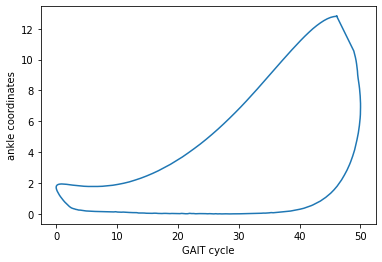

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import io
  
df = pd.read_excel(io.BytesIO(uploaded['Gait_DATA.xlsx']))

plt.plot(df['X (cm)'],df['Y (cm)'])
plt.xlabel('GAIT cycle')
plt.ylabel('ankle coordinates')
